https://www.jisilu.cn/question/268426

日线数据sina也有，但都是不复权的，我用的是：http://money.finance.sina.com.cn/quotes_service/api/json_v2.php/CN_MarketData.getKLineData?symbol=sz002095&scale=240&ma=no&datalen=250

其中的参数可以改，scale单位是分钟。这个地址数据很全，开盘、收盘、最高、最低、成交量都有，遗憾的是数据不除权。


精确的复权数据，我是从tushare上取的，tushare只支持python，不支持VBA。要是能从你提供的地址直接用VBA取就好了。 

In [1]:
import requests
import json
import pandas as pd

In [176]:
def get_hist_k_data(code, datalen):
    r = requests.get('http://money.finance.sina.com.cn/quotes_service/api/json_v2.php/CN_MarketData.getKLineData?symbol={}&scale=240&ma=no&datalen={}'.format(code, datalen))
    rs = r.text
    cols_num = ['open', 'high', 'low', 'close']
    cols = ['day', 'volume'] + cols_num
    for c in cols:
        rs = rs.replace(c, '"{}"'.format(c))
    df1 = pd.DataFrame(json.loads(rs))
    df1.loc[:, cols_num] = df1.loc[:, cols_num].applymap(float)
    df1.loc[:, 'day'] = pd.to_datetime(df1.day)
    return df1

In [177]:
code = 'sh510300'
# code = 'sz159915'
datalen = 250

In [164]:
import matplotlib
%matplotlib inline

In [193]:
df = get_hist_k_data(code, 1250)
df.tail()

,close,day,high,low,open,volume
1245,3.659,2020-02-03,3.736,3.636,3.73,1471075772
1246,3.77,2020-02-04,3.776,3.649,3.65,735843705
1247,3.807,2020-02-05,3.855,3.768,3.784,553287488
1248,3.897,2020-02-06,3.913,3.797,3.823,527965212
1249,3.888,2020-02-07,3.892,3.844,3.87,346989051


In [194]:
df.head()

,close,day,high,low,open,volume
0,3.384,2014-12-18,3.434,3.364,3.39,2241069056
1,3.434,2014-12-19,3.443,3.311,3.387,2142954112
2,3.41,2014-12-22,3.482,3.399,3.434,1869113600
3,3.341,2014-12-23,3.454,3.331,3.385,1907357440
4,3.248,2014-12-24,3.368,3.202,3.341,2090044416


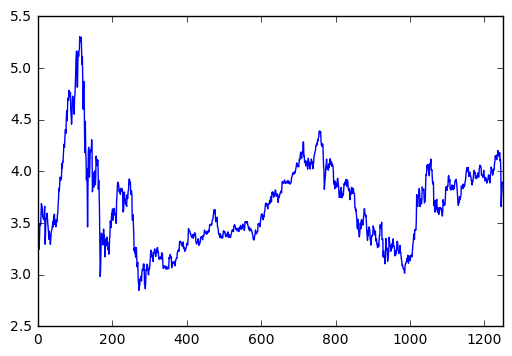

In [195]:
df.close.plot()

In [104]:
def strategy(df):
    """
    每周一定投1000
    """
    df['weekday'] = df.day.dt.weekday    
    df1 = df[df.weekday==0]
    benjin = 1000
    df1['benjin'] = benjin
    df1['num'] = df1.benjin//df1.open//100*100+100
    df1['benjin_real'] = df1.num*df1.open
    print('累计执行定投次数: {}'.format(df1.shape[0]))
    print('累计投入本金: {}'.format(df1.benjin_real.sum()))
    print('累计持股数: {}'.format(df1.num.sum()))
    print('现在持股市值: {}'.format(df1.close.iloc[-1]*df1.num.sum()))
    print('累计收益: {}'.format(df1.close.iloc[-1]*df1.num.sum()/df1.benjin_real.sum()-1))        

In [106]:
strategy(df.copy())

累计执行定投次数: 146
累计投入本金: 168842.4999999999
累计持股数: 45600.0
现在持股市值: 166850.4
累计收益: -0.01179856967291959


C:\Users\ian\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\ian\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\ian\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-

In [108]:
def strategy1(df):
    """
    每周一3 5 定投1000
    """
    df['weekday'] = df.day.dt.weekday    
    df1 = df[df.weekday.isin([0, 2, 4])]
    benjin = 1000
    df1['benjin'] = benjin
    df1['num'] = df1.benjin//df1.open//100*100+100
    df1['benjin_real'] = df1.num*df1.open
    print('累计执行定投次数: {}'.format(df1.shape[0]))
    print('累计投入本金: {}'.format(df1.benjin_real.sum()))
    print('累计持股数: {}'.format(df1.num.sum()))
    print('现在持股市值: {}'.format(df1.close.iloc[-1]*df1.num.sum()))
    print('累计收益: {}'.format(df1.close.iloc[-1]*df1.num.sum()/df1.benjin_real.sum()-1))      

In [109]:
strategy1(df.copy())

累计执行定投次数: 447
累计投入本金: 515437.0999999999
累计持股数: 139500.0
现在持股市值: 542376.0
累计收益: 0.052264185096494


C:\Users\ian\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\ian\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\ian\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-

In [306]:
def strategy1(code, datalen, benjin = 1000, sell_pct=0.1, fee=0.001, dingtou_mode='无脑', sell=True):
    """
    每周一3 5 定投1000
    
    dingtou_mode='无脑', '不涨'
    """
    df = get_hist_k_data(code, datalen)
    zs_ratio = df.close.iloc[-1]/df.close.iloc[0] -1
    df['weekday'] = df.day.dt.weekday    
    df1 = df[df.weekday.isin([0, 2, 4])].copy()
    
    df1['benjin'] = 0
    df1.loc[df1.weekday==0, 'benjin'] = benjin
    df1['open_pct'] = df.open/df.open.shift(1)
    if dingtou_mode=='无脑':
        df1.loc[(df1.weekday.isin([2, 4])), 'benjin'] = benjin  # 不管三七二十一 无脑定投
    elif dingtou_mode=='不涨':
        df1.loc[(df1.weekday.isin([2, 4]))&(df1.open_pct<1), 'benjin'] = benjin  # 只要不涨我就增加定投
    
#     print(df1.iloc[:, 1:].head(50))
    df1['num'] = df1.benjin//df1.open//100*100+100
    df1['benjin_real'] = df1.num*df1.open
    
    df1['sell_price'] = df1.open * (1 + sell_pct)
    
    df1['sell_flag'] = 0  # 表示未卖出 1表示卖出
    if sell:
        count = 0
        for i in range(df1.shape[0]):
            if df1.benjin.iloc[i] > 0 and df1.weekday.iloc[i] in [2, 4]:
                count += 1
                if df1.high.iloc[i:].max()>=df1.sell_price.iloc[i]:
                    df1['sell_flag'].iloc[i] = 1
        print(count)
    df1['sell_money'] = df1.sell_flag * df1.sell_price
    print(df1.loc[df1.weekday.isin([2, 4])&(df1.benjin!=0), 'sell_flag'].value_counts())
    print('累计执行定投次数: {}'.format(df1[df1.benjin!=0].shape[0]))
    print('净执行定投次数: {}'.format(df1[(df1.benjin!=0)&(df1.sell_flag==0)].shape[0]))
    print('累计投入本金: {}'.format(df1.benjin_real.sum()))
    net_benjin = df1.loc[(df1.benjin!=0)&(df1.sell_flag==0), 'benjin_real'].sum()
    print('净投入本金: {}---------------------'.format(net_benjin))
    print('累计买入股数: {}'.format(df1.num.sum()))
    print('净持股数: {}'.format(df1.loc[(df1.benjin!=0)&(df1.sell_flag==0), 'num'].sum()))
    shizhi = df1.close.iloc[-1]*df1.loc[(df1.benjin!=0)&(df1.sell_flag==0), 'num'].sum()
    print('现在持股市值: {}'.format(shizhi))
    sell_val = (df1.sell_flag * df1.sell_price * df1.num).sum()
    print('累计卖出金额: {}'.format(sell_val*(1-fee)))
    print('累计卖出手续费: {}'.format(sell_val*fee))
    sell_val = sell_val*(1-fee)
    print('---------累计绝对收益: {}------------------------------------'.format(shizhi+sell_val-df1.benjin_real.sum()))
    print('累计收益率: {}'.format((shizhi+sell_val-df1.benjin_real.sum())/net_benjin))  
    print('简单年化收益率: {}'.format(((shizhi+sell_val-df1.benjin_real.sum())/net_benjin)/(datalen/250)))       
    
    print('期间指数涨幅: {}'.format(zs_ratio))    

In [314]:
# 如果只买不卖，在震荡市里会被打爆！

code = 'sh510300'

strategy1(code, 250, 10000, dingtou_mode='无脑', sell=False)

0    97
Name: sell_flag, dtype: int64
累计执行定投次数: 148
净执行定投次数: 148
累计投入本金: 1507896.1
净投入本金: 1507896.1---------------------
累计买入股数: 394300.0
净持股数: 394300.0
现在持股市值: 1533038.4
累计卖出金额: 0.0
累计卖出手续费: 0.0
---------累计绝对收益: 25142.299999999814------------------------------------
累计收益率: 0.016673761540997294
简单年化收益率: 0.016673761540997294
期间指数涨幅: 0.24019138755980873


In [315]:
code = 'sh510300'

strategy1(code, 1250, 10000,sell_pct=0.01, dingtou_mode='无脑')

C:\Users\ian\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


501
1    492
0      9
Name: sell_flag, dtype: int64
累计执行定投次数: 745
净执行定投次数: 253
累计投入本金: 7585594.199999996
净投入本金: 2574962.0000000005---------------------
累计买入股数: 2094200.0
净持股数: 705900.0
现在持股市值: 2744539.1999999997
累计卖出金额: 5055677.783478003
累计卖出手续费: 5060.738522000002
---------累计绝对收益: 214622.7834780058------------------------------------
累计收益率: 0.08334988379556893
简单年化收益率: 0.016669976759113785
期间指数涨幅: 0.14893617021276606


In [316]:
code = 'sh510300'

strategy1(code, 1250, 10000,sell_pct=0.02, dingtou_mode='无脑')

C:\Users\ian\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


501
1    485
0     16
Name: sell_flag, dtype: int64
累计执行定投次数: 745
净执行定投次数: 260
累计投入本金: 7585594.199999996
净投入本金: 2646178.0000000005---------------------
累计买入股数: 2094200.0
净持股数: 722400.0
现在持股市值: 2808691.1999999997
累计卖出金额: 5033166.319475997
累计卖出手续费: 5038.204523999998
---------累计绝对收益: 256263.31947600003------------------------------------
累计收益率: 0.09684281234142222
简单年化收益率: 0.019368562468284445
期间指数涨幅: 0.14893617021276606


In [317]:
code = 'sh510300'

strategy1(code, 1250, 10000,sell_pct=0.03, dingtou_mode='无脑')

C:\Users\ian\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


501
1    473
0     28
Name: sell_flag, dtype: int64
累计执行定投次数: 745
净执行定投次数: 272
累计投入本金: 7585594.199999996
净投入本金: 2769484.200000001---------------------
累计买入股数: 2094200.0
净持股数: 750500.0
现在持股市值: 2917944.0
累计卖出金额: 4955632.706700004
累计卖出手续费: 4960.593300000004
---------累计绝对收益: 287982.50670000724------------------------------------
累计收益率: 0.10398416669068093
简单年化收益率: 0.020796833338136186
期间指数涨幅: 0.14893617021276606


In [318]:
code = 'sh510300'

strategy1(code, 1250, 10000,sell_pct=0.04, dingtou_mode='无脑')

C:\Users\ian\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


501
1    463
0     38
Name: sell_flag, dtype: int64
累计执行定投次数: 745
净执行定投次数: 282
累计投入本金: 7585594.199999996
净投入本金: 2871548.700000001---------------------
累计买入股数: 2094200.0
净持股数: 774400.0
现在持股市值: 3010867.1999999997
累计卖出金额: 4897704.71268
累计卖出手续费: 4902.60732
---------累计绝对收益: 322977.7126800036------------------------------------
累计收益率: 0.11247509494789466
简单年化收益率: 0.02249501898957893
期间指数涨幅: 0.14893617021276606


In [319]:
code = 'sh510300'

strategy1(code, 1250, 10000,sell_pct=0.05, dingtou_mode='无脑')

C:\Users\ian\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


501
1    452
0     49
Name: sell_flag, dtype: int64
累计执行定投次数: 745
净执行定投次数: 293
累计投入本金: 7585594.199999996
净投入本金: 2982337.800000001---------------------
累计买入股数: 2094200.0
净持股数: 801800.0
现在持股市值: 3117398.4
累计卖出金额: 4828585.800779999
累计卖出手续费: 4833.419219999999
---------累计绝对收益: 360390.0007800022------------------------------------
累计收益率: 0.1208414421666124
简单年化收益率: 0.024168288433322478
期间指数涨幅: 0.14893617021276606


In [322]:
code = 'sh510300'

strategy1(code, 1250, 10000,sell_pct=0.05, dingtou_mode='不涨')

C:\Users\ian\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


230
1    216
0     14
Name: sell_flag, dtype: int64
累计执行定投次数: 474
净执行定投次数: 258
累计投入本金: 4925971.699999999
净投入本金: 2625702.7000000007---------------------
累计买入股数: 1366300.0
净持股数: 717600.0
现在持股市值: 2790028.8
累计卖出金额: 2307790.0698300023
累计卖出手续费: 2310.1001700000024
---------累计绝对收益: 171847.16983000282------------------------------------
累计收益率: 0.06544806837042243
简单年化收益率: 0.013089613674084486
期间指数涨幅: 0.14893617021276606


In [320]:
code = 'sh510300'

strategy1(code, 1250, 10000, dingtou_mode='无脑')

C:\Users\ian\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


501
1    367
0    134
Name: sell_flag, dtype: int64
累计执行定投次数: 745
净执行定投次数: 378
累计投入本金: 7585594.199999996
净投入本金: 3850118.2---------------------
累计买入股数: 2094200.0
净持股数: 1020100.0
现在持股市值: 3966148.8
累计卖出金额: 4104914.5764000025
累计卖出手续费: 4109.023600000002
---------累计绝对收益: 485469.1764000058------------------------------------
累计收益率: 0.1260920187852949
简单年化收益率: 0.025218403757058982
期间指数涨幅: 0.14893617021276606


In [321]:
code = 'sh510300'

strategy1(code, 1250, 10000,sell_pct=0.2, dingtou_mode='无脑')

C:\Users\ian\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


501
1    262
0    239
Name: sell_flag, dtype: int64
累计执行定投次数: 745
净执行定投次数: 483
累计投入本金: 7585594.199999996
净投入本金: 4921571.999999998---------------------
累计买入股数: 2094200.0
净持股数: 1298900.0
现在持股市值: 5050123.2
累计卖出金额: 3193629.8133600024
累计卖出手续费: 3196.8266400000025
---------累计绝对收益: 658158.8133600065------------------------------------
累计收益率: 0.13372938836615755
简单年化收益率: 0.02674587767323151
期间指数涨幅: 0.14893617021276606


In [280]:
code = 'sh510300'

strategy1(code, 500, 10000,sell_pct=0.01, dingtou_mode='无脑')

C:\Users\ian\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


199
1    192
0      7
Name: sell_flag, dtype: int64
累计执行定投次数: 298
净执行定投次数: 106
累计投入本金: 3034167.200000002
净投入本金: 1079304.0999999996---------------------
累计买入股数: 823200.0
净持股数: 289800.0
现在持股市值: 1126742.4
累计卖出金额: 1972437.3192689999
累计卖出手续费: 1974.411731
---------累计绝对收益: 65012.519268997945------------------------------------
累计收益率: 0.02142680840693223
简单年化收益率: 0.010713404203466115
期间指数涨幅: -0.09010063187456119


In [281]:
code = 'sh510300'

strategy1(code, 500, 10000,sell_pct=0.02, dingtou_mode='无脑')

C:\Users\ian\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


199
1    187
0     12
Name: sell_flag, dtype: int64
累计执行定投次数: 298
净执行定投次数: 111
累计投入本金: 3034167.200000002
净投入本金: 1130363.0999999996---------------------
累计买入股数: 823200.0
净持股数: 302000.0
现在持股市值: 1174176.0
累计卖出金额: 1939938.3018179988
累计卖出手续费: 1941.880181999999
---------累计绝对收益: 79947.1018179967------------------------------------
累计收益率: 0.0263489440588498
简单年化收益率: 0.0131744720294249
期间指数涨幅: -0.09010063187456119


In [282]:
code = 'sh510300'

strategy1(code, 500, 10000,sell_pct=0.03, dingtou_mode='无脑')

C:\Users\ian\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


199
1    181
0     18
Name: sell_flag, dtype: int64
累计执行定投次数: 298
净执行定投次数: 117
累计投入本金: 3034167.200000002
净投入本金: 1191961.4999999998---------------------
累计买入股数: 823200.0
净持股数: 317000.0
现在持股市值: 1232496.0
累计卖出金额: 1895574.3991290003
累计卖出手续费: 1897.4718710000004
---------累计绝对收益: 93903.19912899844------------------------------------
累计收益率: 0.0309485908123317
简单年化收益率: 0.01547429540616585
期间指数涨幅: -0.09010063187456119


In [283]:
code = 'sh510300'

strategy1(code, 500, 10000,sell_pct=0.04, dingtou_mode='无脑')

C:\Users\ian\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


199
1    173
0     26
Name: sell_flag, dtype: int64
累计执行定投次数: 298
净执行定投次数: 125
累计投入本金: 3034167.200000002
净投入本金: 1273343.9999999998---------------------
累计买入股数: 823200.0
净持股数: 336900.0
现在持股市值: 1309867.2
累计卖出金额: 1829424.8718719995
累计卖出手续费: 1831.2561279999995
---------累计绝对收益: 105124.8718719976------------------------------------
累计收益率: 0.03464702666088981
简单年化收益率: 0.017323513330444906
期间指数涨幅: -0.09010063187456119


In [284]:
code = 'sh510300'

strategy1(code, 500, 10000,sell_pct=0.05, dingtou_mode='无脑')

C:\Users\ian\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


199
1    163
0     36
Name: sell_flag, dtype: int64
累计执行定投次数: 298
净执行定投次数: 135
累计投入本金: 3034167.200000002
净投入本金: 1373971.5---------------------
累计买入股数: 823200.0
净持股数: 361900.0
现在持股市值: 1407067.2
累计卖出金额: 1741462.2795150005
累计卖出手续费: 1743.2054850000006
---------累计绝对收益: 114362.2795149982------------------------------------
累计收益率: 0.03769148895782615
简单年化收益率: 0.018845744478913073
期间指数涨幅: -0.09010063187456119


In [286]:
code = 'sh510300'

strategy1(code, 500, 10000,sell_pct=0.2, dingtou_mode='无脑')

C:\Users\ian\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


199
0    138
1     61
Name: sell_flag, dtype: int64
累计执行定投次数: 298
净执行定投次数: 237
累计投入本金: 3034167.200000002
净投入本金: 2414364.800000001---------------------
累计买入股数: 823200.0
净持股数: 634400.0
现在持股市值: 2466547.1999999997
累计卖出金额: 743019.11712
累计卖出手续费: 743.76288
---------累计绝对收益: 175399.11711999774------------------------------------
累计收益率: 0.05780799328395525
简单年化收益率: 0.028903996641977625
期间指数涨幅: -0.09010063187456119


In [285]:
code = 'sh510300'

strategy1(code, 500, 10000, dingtou_mode='无脑')

C:\Users\ian\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


199
1    106
0     93
Name: sell_flag, dtype: int64
累计执行定投次数: 298
净执行定投次数: 192
累计投入本金: 3034167.200000002
净投入本金: 1955845.8000000003---------------------
累计买入股数: 823200.0
净持股数: 510800.0
现在持股市值: 1985990.4
累计卖出金额: 1184967.38646
累计卖出手续费: 1186.15354
---------累计绝对收益: 136790.58645999804------------------------------------
累计收益率: 0.045083404256692994
简单年化收益率: 0.022541702128346497
期间指数涨幅: -0.09010063187456119


In [307]:
code = 'sh510300'

strategy1(code, 250, 10000,sell_pct=0.01, dingtou_mode='无脑')

C:\Users\ian\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


97
1    93
0     4
Name: sell_flag, dtype: int64
累计执行定投次数: 148
净执行定投次数: 55
累计投入本金: 1507896.1
净投入本金: 559662.5999999999---------------------
累计买入股数: 394300.0
净持股数: 145400.0
现在持股市值: 565315.2
累计卖出金额: 956758.119165
累计卖出手续费: 957.7158350000001
---------累计绝对收益: 14177.2191649999------------------------------------
累计收益率: 0.025331725159051015
简单年化收益率: 0.025331725159051015
期间指数涨幅: 0.24019138755980873


In [308]:
code = 'sh510300'

strategy1(code, 250, 10000,sell_pct=0.02, dingtou_mode='无脑')

C:\Users\ian\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


97
1    90
0     7
Name: sell_flag, dtype: int64
累计执行定投次数: 148
净执行定投次数: 58
累计投入本金: 1507896.1
净投入本金: 590612.6---------------------
累计买入股数: 394300.0
净持股数: 152900.0
现在持股市值: 594475.2
累计卖出金额: 934693.5408300003
累计卖出手续费: 935.6291700000003
---------累计绝对收益: 21272.640830000164------------------------------------
累计收益率: 0.03601792584513125
简单年化收益率: 0.03601792584513125
期间指数涨幅: 0.24019138755980873


In [309]:
code = 'sh510300'

strategy1(code, 250, 10000,sell_pct=0.03, dingtou_mode='无脑')

C:\Users\ian\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


97
1    89
0     8
Name: sell_flag, dtype: int64
累计执行定投次数: 148
净执行定投次数: 59
累计投入本金: 1507896.1
净投入本金: 600829.4---------------------
累计买入股数: 394300.0
净持股数: 155600.0
现在持股市值: 604972.7999999999
累计卖出金额: 933344.422299
累计卖出手续费: 934.2787010000001
---------累计绝对收益: 30421.12229899969------------------------------------
累计收益率: 0.050631880362378555
简单年化收益率: 0.050631880362378555
期间指数涨幅: 0.24019138755980873


In [310]:
code = 'sh510300'

strategy1(code, 250, 10000,sell_pct=0.04, dingtou_mode='无脑')

C:\Users\ian\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


97
1    85
0    12
Name: sell_flag, dtype: int64
累计执行定投次数: 148
净执行定投次数: 63
累计投入本金: 1507896.1
净投入本金: 641526.9---------------------
累计买入股数: 394300.0
净持股数: 165600.0
现在持股市值: 643852.7999999999
累计卖出金额: 900122.9440320001
累计卖出手续费: 901.0239680000001
---------累计绝对收益: 36079.6440320001------------------------------------
累计收益率: 0.05624026682591189
简单年化收益率: 0.05624026682591189
期间指数涨幅: 0.24019138755980873


In [339]:
code = 'sh510300'

strategy1(code, 250, 5000,sell_pct=0.05, dingtou_mode='无脑')

C:\Users\ian\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


97
1    77
0    20
Name: sell_flag, dtype: int64
累计执行定投次数: 148
净执行定投次数: 71
累计投入本金: 766618.6000000002
净投入本金: 369357.1999999999---------------------
累计买入股数: 200400.0
净持股数: 94900.0
现在持股市值: 368971.2
累计卖出金额: 416707.34553
累计卖出手续费: 417.12447
---------累计绝对收益: 19059.945529999794------------------------------------
累计收益率: 0.051603016077660865
简单年化收益率: 0.051603016077660865
期间指数涨幅: 0.24019138755980873


In [347]:
code = 'sz159915'
strategy1(code, 250, 5000,sell_pct=0.1, dingtou_mode='无脑')

C:\Users\ian\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


97
1    90
0     7
Name: sell_flag, dtype: int64
累计执行定投次数: 148
净执行定投次数: 58
累计投入本金: 751955.7
净投入本金: 294470.20000000007---------------------
累计买入股数: 486600.0
净持股数: 186600.0
现在持股市值: 362004.0
累计卖出金额: 502730.8159499998
累计卖出手续费: 503.2340499999998
---------累计绝对收益: 112779.11594999977------------------------------------
累计收益率: 0.38298991188242393
简单年化收益率: 0.38298991188242393
期间指数涨幅: 0.6207184628237259


In [313]:
code = 'sh510300'

strategy1(code, 250, 10000, dingtou_mode='无脑')

C:\Users\ian\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


97
0    61
1    36
Name: sell_flag, dtype: int64
累计执行定投次数: 148
净执行定投次数: 112
累计投入本金: 1507896.1
净投入本金: 1141069.9---------------------
累计买入股数: 394300.0
净持股数: 292600.0
现在持股市值: 1137628.8
累计卖出金额: 403105.3111800001
累计卖出手续费: 403.50882000000007
---------累计绝对收益: 32838.011179999914------------------------------------
累计收益率: 0.02877826431141503
简单年化收益率: 0.02877826431141503
期间指数涨幅: 0.24019138755980873


In [203]:
code = 'sh510300'

strategy1(code, 250, 10000, dingtou_mode='不涨')

C:\Users\ian\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


44
0    28
1    16
Name: sell_flag, dtype: int64
累计执行定投次数: 95
净执行定投次数: 79
累计投入本金: 989297.7
净投入本金: 805468.0999999997
累计买入股数: 258100.0
净持股数: 208000.0
现在持股市值: 808704.0
累计卖出金额: 179912.37
累计收益: 183148.27000000025
累计收益率: 0.22738115885657084
简单年化收益率: 0.22738115885657084
期间指数涨幅: 0.24019138755980873


In [198]:
code = 'sh510300'

strategy1(code, 1250, 10000)

C:\Users\ian\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


501
1    367
0    134
Name: sell_flag, dtype: int64
累计执行定投次数: 745
净执行定投次数: 378
累计投入本金: 7585594.199999996
净投入本金: 3850118.2
累计买入股数: 2094200.0
净持股数: 1020100.0
现在持股市值: 3966148.8
累计卖出金额: 4109023.6000000024
累计收益: 4225054.200000002
累计收益率: 1.0973829842418867
简单年化收益率: 0.21947659684837734
期间指数涨幅: 0.14893617021276606


In [201]:
code = 'sh510300'

strategy1(code, 1250, 10000, dingtou_mode='不涨')

C:\Users\ian\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


230
1    176
0     54
Name: sell_flag, dtype: int64
累计执行定投次数: 474
净执行定投次数: 298
累计投入本金: 4925971.699999999
净投入本金: 3034641.800000001
累计买入股数: 1366300.0
净持股数: 821200.0
现在持股市值: 3192825.6
累计卖出金额: 1970271.9300000004
累计收益: 2128455.729999999
累计收益率: 0.7013861504181476
简单年化收益率: 0.14027723008362952
期间指数涨幅: 0.14893617021276606


In [180]:
code = 'sz159915'

strategy1(get_hist_k_data(code, 250), 10000)

C:\Users\ian\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


34
1    32
0     2
Name: sell_flag, dtype: int64
累计执行定投次数: 85
净执行定投次数: 53
累计投入本金: 865835.7000000001
净投入本金: 533691.3
累计买入股数: 562400.0
净持股数: 343000.0
现在持股市值: 665420.0
累计卖出金额: 354494.36
累计收益: 486223.05999999994
累计收益率: 0.9110567475992206
期间指数涨幅: 0.6207184628237259


In [149]:
strategy1(get_hist_k_data(code, 500))

C:\Users\ian\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


95
1    54
0    41
Name: sell_flag, dtype: int64
累计执行定投次数: 194
净执行定投次数: 140
累计投入本金: 266106.6
净投入本金: 165211.59999999995
累计买入股数: 72300.0
净持股数: 43800.0
现在持股市值: 170294.4
累计卖出金额: 68189.33
累计收益: 0.4435047539034793


In [150]:
strategy1(get_hist_k_data(code, 750))

C:\Users\ian\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


132
1    85
0    47
Name: sell_flag, dtype: int64
累计执行定投次数: 278
净执行定投次数: 193
累计投入本金: 383754.9999999999
净投入本金: 224978.49999999994
累计买入股数: 104000.0
净持股数: 59700.0
现在持股市值: 232113.6
累计卖出金额: 105235.13000000002
累计收益: 0.49947097167062693


In [168]:
code = 'sz159915'

In [169]:
strategy1(get_hist_k_data(code, 250), 10000)

C:\Users\ian\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


34
1    32
0     2
Name: sell_flag, dtype: int64
累计执行定投次数: 85
净执行定投次数: 53
累计投入本金: 865835.7000000001
净投入本金: 533691.3
累计买入股数: 562400.0
净持股数: 343000.0
现在持股市值: 665420.0
累计卖出金额: 354494.36
累计收益: 486223.05999999994
累计收益率: 0.9110567475992206


In [170]:
strategy1(get_hist_k_data(code, 500))

C:\Users\ian\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


82
1    80
0     2
Name: sell_flag, dtype: int64
累计执行定投次数: 181
净执行定投次数: 101
累计投入本金: 212961.8
净投入本金: 108935.30000000005
累计买入股数: 142900.0
净持股数: 72400.0
现在持股市值: 140456.0
累计卖出金额: 94685.03000000003
累计收益: 126205.72999999998
累计收益率: 1.158538416840087


In [171]:
strategy1(get_hist_k_data(code, 750))

C:\Users\ian\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


134
1    109
0     25
Name: sell_flag, dtype: int64
累计执行定投次数: 280
净执行定投次数: 171
累计投入本金: 328194.39999999973
净投入本金: 184533.19999999998
累计买入股数: 208700.0
净持股数: 115000.0
现在持股市值: 223100.0
累计卖出金额: 128636.75000000003
累计收益: 167203.55000000002
累计收益率: 0.9060892565673822


In [331]:
code = 'sz159915'

strategy1(code, 500, 10000,sell_pct=0.01, dingtou_mode='无脑', sell=False)

0    199
Name: sell_flag, dtype: int64
累计执行定投次数: 298
净执行定投次数: 298
累计投入本金: 3002681.9
净投入本金: 3002681.9---------------------
累计买入股数: 2006500.0
净持股数: 2006500.0
现在持股市值: 3892610.0
累计卖出金额: 0.0
累计卖出手续费: 0.0
---------累计绝对收益: 889928.1000000001------------------------------------
累计收益率: 0.2963777481723922
简单年化收益率: 0.1481888740861961
期间指数涨幅: 0.1513353115727003


In [324]:
code = 'sz159915'

strategy1(code, 500, 10000,sell_pct=0.01, dingtou_mode='无脑')

C:\Users\ian\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


199
1    198
0      1
Name: sell_flag, dtype: int64
累计执行定投次数: 298
净执行定投次数: 100
累计投入本金: 3002681.9
净投入本金: 1007219.1---------------------
累计买入股数: 2006500.0
净持股数: 670500.0
现在持股市值: 1300770.0
累计卖出金额: 2013402.0105720013
累计卖出手续费: 2015.4174280000013
---------累计绝对收益: 311490.11057200143------------------------------------
累计收益率: 0.3092575493971485
简单年化收益率: 0.15462877469857425
期间指数涨幅: 0.1513353115727003


In [325]:

strategy1(code, 500, 10000,sell_pct=0.02, dingtou_mode='无脑')

C:\Users\ian\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


199
1    198
0      1
Name: sell_flag, dtype: int64
累计执行定投次数: 298
净执行定投次数: 100
累计投入本金: 3002681.9
净投入本金: 1007219.1---------------------
累计买入股数: 2006500.0
净持股数: 670500.0
现在持股市值: 1300770.0
累计卖出金额: 2033336.683943999
累计卖出手续费: 2035.372055999999
---------累计绝对收益: 331424.7839439991------------------------------------
累计收益率: 0.32904934382598494
简单年化收益率: 0.16452467191299247
期间指数涨幅: 0.1513353115727003


In [326]:

strategy1(code, 500, 10000,sell_pct=0.03, dingtou_mode='无脑')

C:\Users\ian\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


199
1    198
0      1
Name: sell_flag, dtype: int64
累计执行定投次数: 298
净执行定投次数: 100
累计投入本金: 3002681.9
净投入本金: 1007219.1---------------------
累计买入股数: 2006500.0
净持股数: 670500.0
现在持股市值: 1300770.0
累计卖出金额: 2053271.3573159983
累计卖出手续费: 2055.3266839999983
---------累计绝对收益: 351359.4573159986------------------------------------
累计收益率: 0.3488411382548232
简单年化收益率: 0.1744205691274116
期间指数涨幅: 0.1513353115727003


In [327]:

strategy1(code, 500, 10000,sell_pct=0.04, dingtou_mode='无脑')

C:\Users\ian\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


199
1    197
0      2
Name: sell_flag, dtype: int64
累计执行定投次数: 298
净执行定投次数: 101
累计投入本金: 3002681.9
净投入本金: 1017381.9---------------------
累计买入股数: 2006500.0
净持股数: 675900.0
现在持股市值: 1311246.0
累计卖出金额: 2062647.2880000009
累计卖出手续费: 2064.712000000001
---------累计绝对收益: 371211.38800000073------------------------------------
累计收益率: 0.36486926688984805
简单年化收益率: 0.18243463344492403
期间指数涨幅: 0.1513353115727003


In [328]:

strategy1(code, 500, 10000,sell_pct=0.05, dingtou_mode='无脑')

C:\Users\ian\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


199
1    196
0      3
Name: sell_flag, dtype: int64
累计执行定投次数: 298
净执行定投次数: 102
累计投入本金: 3002681.9
净投入本金: 1027431.3---------------------
累计买入股数: 2006500.0
净持股数: 681300.0
现在持股市值: 1321722.0
累计卖出金额: 2071939.116869999
累计卖出手续费: 2074.0131299999994
---------累计绝对收益: 390979.2168699992------------------------------------
累计收益率: 0.3805404963524074
简单年化收益率: 0.1902702481762037
期间指数涨幅: 0.1513353115727003


In [329]:

strategy1(code, 500, 10000, dingtou_mode='无脑')

C:\Users\ian\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


199
1    191
0      8
Name: sell_flag, dtype: int64
累计执行定投次数: 298
净执行定投次数: 107
累计投入本金: 3002681.9
净投入本金: 1078066.1999999997---------------------
累计买入股数: 2006500.0
净持股数: 709100.0
现在持股市值: 1375654.0
累计卖出金额: 2114960.1927300002
累计卖出手续费: 2117.07727
---------累计绝对收益: 487932.29273000034------------------------------------
累计收益率: 0.4525995646000222
简单年化收益率: 0.2262997823000111
期间指数涨幅: 0.1513353115727003


In [332]:
code = 'sz159915'

strategy1(code, 250, 10000,sell_pct=0.01, dingtou_mode='无脑',sell=False)

0    97
Name: sell_flag, dtype: int64
累计执行定投次数: 148
净执行定投次数: 148
累计投入本金: 1491219.6999999997
净投入本金: 1491219.6999999997---------------------
累计买入股数: 965000.0
净持股数: 965000.0
现在持股市值: 1872100.0
累计卖出金额: 0.0
累计卖出手续费: 0.0
---------累计绝对收益: 380880.3000000003------------------------------------
累计收益率: 0.255415281866247
简单年化收益率: 0.255415281866247
期间指数涨幅: 0.6207184628237259


In [333]:
code = 'sz159915'

strategy1(code, 250, 10000,sell_pct=0.01, dingtou_mode='无脑')

C:\Users\ian\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


97
1    96
0     1
Name: sell_flag, dtype: int64
累计执行定投次数: 148
净执行定投次数: 52
累计投入本金: 1491219.6999999997
净投入本金: 523410.9---------------------
累计买入股数: 965000.0
净持股数: 337300.0
现在持股市值: 654362.0
累计卖出金额: 976509.4011119998
累计卖出手续费: 977.4868879999998
---------累计绝对收益: 139651.70111200004------------------------------------
累计收益率: 0.26681083850565596
简单年化收益率: 0.26681083850565596
期间指数涨幅: 0.6207184628237259


In [334]:

strategy1(code, 250, 10000,sell_pct=0.02, dingtou_mode='无脑')

C:\Users\ian\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


97
1    96
0     1
Name: sell_flag, dtype: int64
累计执行定投次数: 148
净执行定投次数: 52
累计投入本金: 1491219.6999999997
净投入本金: 523410.9---------------------
累计买入股数: 965000.0
净持股数: 337300.0
现在持股市值: 654362.0
累计卖出金额: 986177.8110240003
累计卖出手续费: 987.1649760000003
---------累计绝对收益: 149320.11102400068------------------------------------
累计收益率: 0.28528276928126767
简单年化收益率: 0.28528276928126767
期间指数涨幅: 0.6207184628237259


In [335]:

strategy1(code, 250, 10000,sell_pct=0.03, dingtou_mode='无脑')

C:\Users\ian\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


97
1    96
0     1
Name: sell_flag, dtype: int64
累计执行定投次数: 148
净执行定投次数: 52
累计投入本金: 1491219.6999999997
净投入本金: 523410.9---------------------
累计买入股数: 965000.0
净持股数: 337300.0
现在持股市值: 654362.0
累计卖出金额: 995846.2209360001
累计卖出手续费: 996.8430640000001
---------累计绝对收益: 158988.5209360004------------------------------------
累计收益率: 0.30375470005687766
简单年化收益率: 0.30375470005687766
期间指数涨幅: 0.6207184628237259


In [336]:

strategy1(code, 250, 10000,sell_pct=0.04, dingtou_mode='无脑')

C:\Users\ian\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


97
1    95
0     2
Name: sell_flag, dtype: int64
累计执行定投次数: 148
净执行定投次数: 53
累计投入本金: 1491219.6999999997
净投入本金: 533573.7---------------------
累计买入股数: 965000.0
净持股数: 342700.0
现在持股市值: 664838.0
累计卖出金额: 994955.88816
累计卖出手续费: 995.95184
---------累计绝对收益: 168574.18816000037------------------------------------
累计收益率: 0.3159342151983885
简单年化收益率: 0.3159342151983885
期间指数涨幅: 0.6207184628237259


In [337]:

strategy1(code, 250, 10000,sell_pct=0.05, dingtou_mode='无脑')

C:\Users\ian\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


97
1    94
0     3
Name: sell_flag, dtype: int64
累计执行定投次数: 148
净执行定投次数: 54
累计投入本金: 1491219.6999999997
净投入本金: 543623.1---------------------
累计买入股数: 965000.0
净持股数: 348100.0
现在持股市值: 675314.0
累计卖出金额: 993981.4535700001
累计卖出手续费: 994.9764300000002
---------累计绝对收益: 178075.7535700004------------------------------------
累计收益率: 0.3275720872972477
简单年化收益率: 0.3275720872972477
期间指数涨幅: 0.6207184628237259


In [338]:

strategy1(code, 250, 10000, dingtou_mode='无脑')

C:\Users\ian\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


97
1    90
0     7
Name: sell_flag, dtype: int64
累计执行定投次数: 148
净执行定投次数: 58
累计投入本金: 1491219.6999999997
净投入本金: 584151.9000000001---------------------
累计买入股数: 965000.0
净持股数: 370200.0
现在持股市值: 718188.0
累计卖出金额: 996776.8054199999
累计卖出手续费: 997.7745799999999
---------累计绝对收益: 223745.10542000015------------------------------------
累计收益率: 0.3830255545175837
简单年化收益率: 0.3830255545175837
期间指数涨幅: 0.6207184628237259


In [262]:
code = 'sz159915'

strategy1(code, 1250, 10000,sell_pct=0.01, dingtou_mode='无脑')

C:\Users\ian\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


501
1    481
0     20
Name: sell_flag, dtype: int64
累计执行定投次数: 745
净执行定投次数: 264
累计投入本金: 7517752.299999997
净投入本金: 2664057.700000001---------------------
累计买入股数: 4282300.0
净持股数: 1495300.0
现在持股市值: 2900882.0
累计卖出金额: 4897329.314453995
累计卖出手续费: 4902.2315459999945
---------累计绝对收益: 5134153.614453994------------------------------------
累计收益率: 1.9271930988784485
简单年化收益率: 0.3854386197756897
期间指数涨幅: 0.23018389346861134


In [263]:

strategy1(code, 1250, 10000,sell_pct=0.02, dingtou_mode='无脑')

C:\Users\ian\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


501
1    463
0     38
Name: sell_flag, dtype: int64
累计执行定投次数: 745
净执行定投次数: 282
累计投入本金: 7517752.299999997
净投入本金: 2846782.7000000025---------------------
累计买入股数: 4282300.0
净持股数: 1570300.0
现在持股市值: 3046382.0
累计卖出金额: 4759624.603007999
累计卖出手续费: 4764.388992
---------累计绝对收益: 4959223.903007997------------------------------------
累计收益率: 1.7420451174611933
简单年化收益率: 0.3484090234922387
期间指数涨幅: 0.23018389346861134


In [264]:

strategy1(code, 1250, 10000,sell_pct=0.03, dingtou_mode='无脑')

C:\Users\ian\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


501
1    441
0     60
Name: sell_flag, dtype: int64
累计执行定投次数: 745
净执行定投次数: 304
累计投入本金: 7517752.299999997
净投入本金: 3069055.7000000025---------------------
累计买入股数: 4282300.0
净持股数: 1676800.0
现在持股市值: 3252992.0
累计卖出金额: 4577575.340501997
累计卖出手续费: 4582.157497999997
---------累计绝对收益: 4761511.640501995------------------------------------
累计收益率: 1.5514582027631465
简单年化收益率: 0.3102916405526293
期间指数涨幅: 0.23018389346861134


In [265]:

strategy1(code, 1250, 10000,sell_pct=0.04, dingtou_mode='无脑')

C:\Users\ian\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


501
1    426
0     75
Name: sell_flag, dtype: int64
累计执行定投次数: 745
净执行定投次数: 319
累计投入本金: 7517752.299999997
净投入本金: 3220571.100000002---------------------
累计买入股数: 4282300.0
净持股数: 1751000.0
现在持股市值: 3396940.0
累计卖出金额: 4464599.379552004
累计卖出手续费: 4469.068448000004
---------累计绝对收益: 4640968.2795520015------------------------------------
累计收益率: 1.4410389137355168
简单年化收益率: 0.28820778274710335
期间指数涨幅: 0.23018389346861134


In [266]:

strategy1(code, 1250, 10000,sell_pct=0.05, dingtou_mode='无脑')

C:\Users\ian\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


501
1    413
0     88
Name: sell_flag, dtype: int64
累计执行定投次数: 745
净执行定投次数: 332
累计投入本金: 7517752.299999997
净投入本金: 3352018.3000000026---------------------
累计买入股数: 4282300.0
净持股数: 1815700.0
现在持股市值: 3522458.0
累计卖出金额: 4369646.6793
累计卖出手续费: 4374.0207
---------累计绝对收益: 4540086.379299997------------------------------------
累计收益率: 1.354433649511995
简单年化收益率: 0.27088672990239904
期间指数涨幅: 0.23018389346861134


In [267]:

strategy1(code, 1250, 10000, dingtou_mode='无脑')

C:\Users\ian\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


501
1    343
0    158
Name: sell_flag, dtype: int64
累计执行定投次数: 745
净执行定投次数: 402
累计投入本金: 7517752.299999997
净投入本金: 4059217.4000000046---------------------
累计买入股数: 4282300.0
净持股数: 2169400.0
现在持股市值: 4208636.0
累计卖出金额: 3800584.00161
累计卖出手续费: 3804.38839
---------累计绝对收益: 3950002.601609995------------------------------------
累计收益率: 0.973094617107719
简单年化收益率: 0.1946189234215438
期间指数涨幅: 0.23018389346861134
